Experiment 1 Sampling & Reconstruction 

a: Write a MATLAB program to generate a sinusoidal sequence x(n) = Acos(ω0n) and plot the sequence. The input data specified by the user are the desired length L, amplitude A, and the angular frequency ω0, where 0<ω0 < π Using this program, generate the sinusoidal sequences for  (ω0 , =0, π/8, π/2, π) frequencies. 


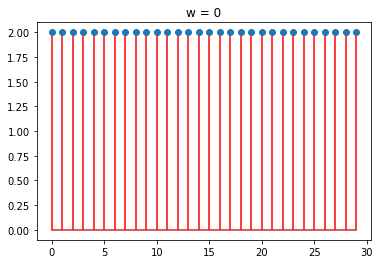

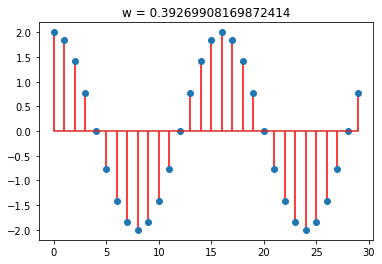

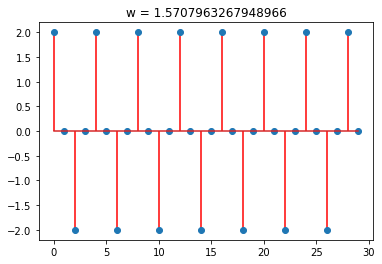

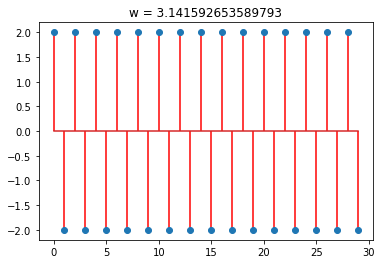

In [5]:
import matplotlib.pyplot as plt
import numpy as np 
A = 2
angles = [0, np.pi/8, np.pi/2, np.pi]
fs = 30 

for angle in angles:
    x = np.arange(fs)
    y = A * np.cos(angle * x)
    plt.figure()
    plt.title(f"w = {angle}")
    plt.stem(x,y, 'r', markerfmt ='o')
    plt.show()

b : Generate and plot each of the following sequences over the indicated interval.



100


ValueError: x and y must have same first dimension, but have shapes (25,) and (100,)

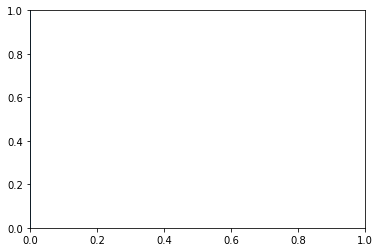

In [104]:
import matplotlib.pyplot as plt
import numpy as np 
# Function to plot Impulse signal (i) 
def unit_impulse(a, n): 
    delta =[] 
    for sample in n: 
        if sample == a: 
            delta.append(1) 
        else: 
            delta.append(0) 
              
    return delta 

UL = 25
LL = 0
res_list = []
d=[]
final=[]
d1=[]
n = np.arange(LL, UL, 1) 
for i in range(10):   
    d.append(unit_impulse(2*i, n))  
    d1.append(unit_impulse((2*i)+1, n))
for i in range(10):
    for j in range(0, len(d)): 
        res_list.append((i+1)*(d[i][j]-d1[i][j]))
    final.append(res_list)
plt.stem(n, final[0]) 
plt.xlabel('n') 
plt.xticks(np.arange(LL, UL, 1)) 
plt.yticks([0, 1]) 
plt.ylabel('d[n]') 
plt.title('Unit Impulse i')  

Text(0.5, 1.0, 'Unit Impulse ii')

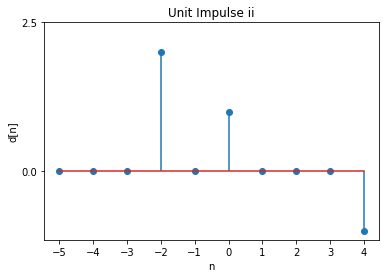

In [8]:
# Function to plot Impulse signal (ii)
def unit_impulse(a, n): 
    delta =[] 
    for sample in n: 
        if sample == a: 
            delta.append(1) 
        else: 
            delta.append(0) 
              
    return delta 

UL = 5
LL = -5
n = np.arange(LL, UL, 1) 
d = unit_impulse(-2, n)  
d2 = unit_impulse(0, n)
d3 = unit_impulse(4, n)
res_list = [] 
for i in range(0, len(d)): 
    res_list.append(2*(d[i]) + d2[i] -d3[i])
    
plt.stem(n, res_list) 
plt.xlabel('n') 
plt.xticks(np.arange(LL, UL, 1)) 
plt.yticks([0, 2.5]) 
plt.ylabel('d[n]') 
plt.title('Unit Impulse ii') 

EXP 2 : Fourier Transform 
           
Given the sinusoid

xn=2 cos n π4  

Obtained by sampling the analog signal
    x(t)=2 cos(2000 π t)

with a sampling rate of fs=8000 Hz


i.  To compute the spectrum of a rectangular window function with a window size 50x50

ii. To compute the spectrum of a Hamming window function with a window size 100x100

iii. To compute the spectrum of a Hanning window function with a window size 150x150

Exp 3: To perform Discrete Convolution 

Problem Statement  : Write the program to compute the convolution of the following two sequences:
x(n) = {2,1,-3,2,1,-3,2,1,-3,2,1}, and h(n) ={1,1}. Here, x(n) is a periodic sequence.

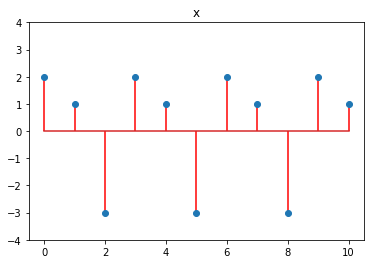

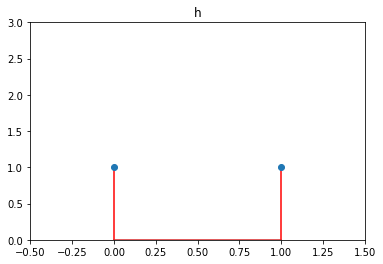

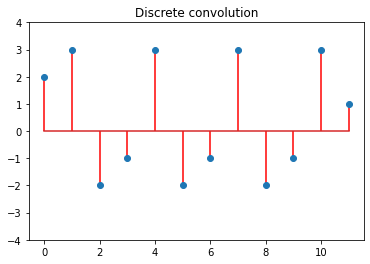

In [87]:
from scipy import signal
import numpy as np
x = [2,1,-3,2,1,-3,2,1,-3,2,1]
h = [1,1]


xx = [i for i in range(len(x))]
plt.figure()
plt.ylim(-4, 4)
plt.title("x")
plt.stem(xx, x, 'r', markerfmt ='o', label = str(angle) )
plt.show()

hx = [i for i in range(len(h))]
plt.figure()
plt.title("h")
plt.ylim(0, 3)
plt.xlim(-0.5, 1.5)
plt.stem(hx, h, 'r', markerfmt ='o', label = str(angle) )
plt.show()

x=np.array([2,1,-3,2,1,-3,2,1,-3,2,1])
h=np.array([1,1])
yy = signal.convolve(x, h)
yx = [i for i in range(len(yy))]
plt.figure()
plt.title("Discrete convolution")
plt.ylim(-4, 4)
plt.stem(yx, yy, 'r', markerfmt ='o', label = str(angle) )
plt.show()


Exp 4 : To perform Discrete Correlation 

Problem Statement : Let x(n) = {3, 11, 7, 0, -1, 4, 2} be a sampled signal transmitted towards target 
y(n) = 0.8x(n - 2) + w(n) and y(n)be the received signal. where
w(n)  is Gaussian noise sequence with mean 0 and variance 1. Compute the cross-correlation between y(n)and x(n). Use the plot to estimate the value of the delay D.

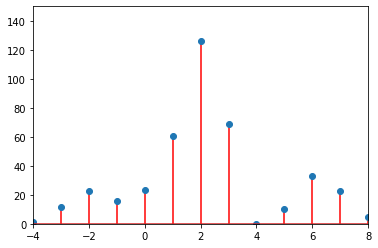

In [50]:
from scipy import signal
xn = [3, 11, 7, 0, -1, 4, 2]
xnminus2 = [0.8*(x-2) for x in xn]
y = xnminus2 + np.random.normal(0,1,len(xnminus2))
yf = y[::-1]
nx = np.arange(-3,4,1)
ny = nx + 2
N1 = len(nx)
N2 = len(ny)
n3 = np.arange(nx[0]+ny[0], nx[N1-1]+ny[N2-1]+1, 1)
corr = signal.convolve(xn, yf, mode='full')
plt.figure()
plt.ylim(0, 150)
plt.xlim(n3[0], n3[-1])
plt.stem(n3, np.abs(corr), 'r', markerfmt ='o')
plt.show()

Exp 5 : To perform Discrete  Fourier Transform 

a. Find DTFS of x1(n)

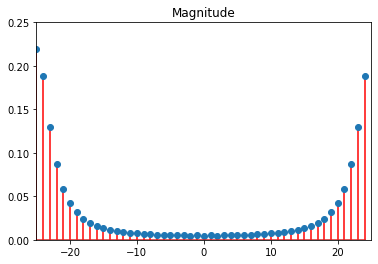

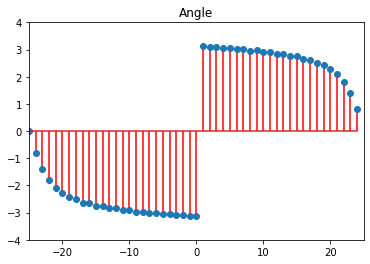

In [95]:
from scipy.fft import fft

N = 50
k = np.arange(-25,25)
signal = []
for n in range(25):
    signal.append(n * np.exp(-0.3 * n)/N)
dft = fft(signal, 50)
plt.figure()
plt.xlim(-25,25)
plt.ylim(0, 0.25)
plt.title("Magnitude")
plt.stem(k, np.abs(dft), 'r', markerfmt ='o')
plt.show()

angle = np.angle(dft)
plt.figure()
plt.xlim(-25,25)
plt.ylim(-4,4)
plt.title("Angle")
plt.stem(k, angle, 'r', markerfmt ='o')
plt.show()

b. Find DTFS of x2(n)

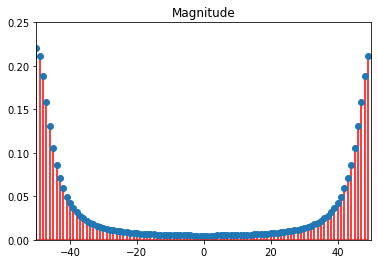

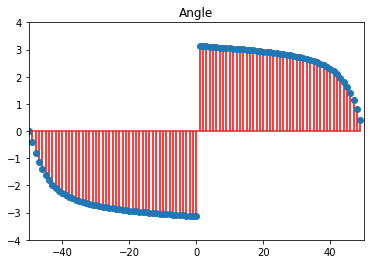

In [96]:
from scipy.fft import fft

N = 50
k = np.arange(-50,50)
signal = []
for n in range(50):
    signal.append(n * np.exp(-0.3 * n)/N)
dft = fft(signal, 100)
plt.figure()
plt.xlim(-50,50)
plt.ylim(0, 0.25)
plt.title("Magnitude")
plt.stem(k, np.abs(dft), 'r', markerfmt ='o')
plt.show()

angle = np.angle(dft)
plt.figure()
plt.xlim(-50,50)
plt.ylim(-4,4)
plt.title("Angle")
plt.stem(k, angle, 'r', markerfmt ='o')
plt.show()

Exp 6 : Fast Fourier Transform 


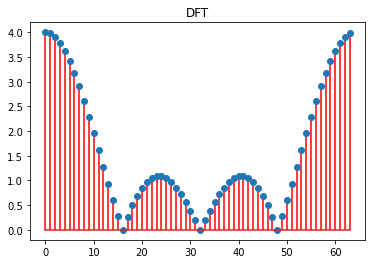

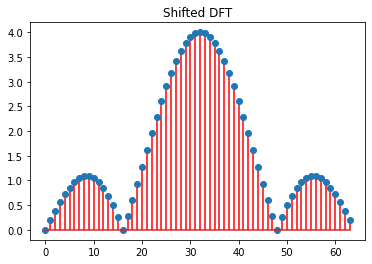

In [80]:
import numpy as np
from scipy.fft import fft, fftshift
x = np.ones(4)
X32f = fft(x, 64)
shX32f = fftshift(X32f)
N = np.arange(64)
plt.figure()
plt.title("DFT")
plt.stem(N, np.abs(X32f), 'r', markerfmt ='o')
plt.show()

plt.figure()
plt.title("Shifted DFT")
plt.stem(N, np.abs(shX32f), 'r')
plt.show()

Experiment 7 Image Tranformation


In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

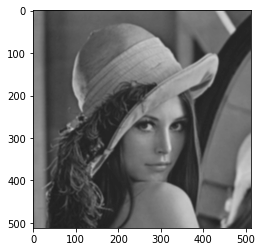

In [36]:
img_raw = cv2.imread("./blurred.png")
img = cv2.cvtColor(img_raw, cv2.COLOR_BGR2GRAY)# color to grayscale
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

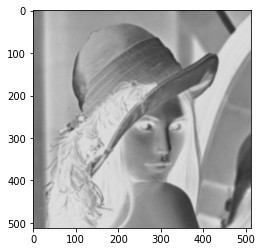

In [37]:
negative = cv2.bitwise_not(img)# Negation
plt.imshow(negative, cmap='gray', vmin=0, vmax=255)

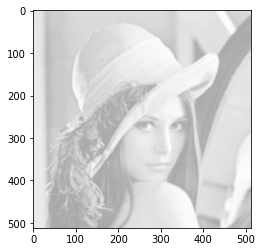

In [38]:
c = 255 / np.log(1 + np.max(img)) #log transformation
log_image = c * (np.log(img + 1)) 
log_image = np.array(log_image, dtype = np.uint8) 
plt.imshow(log_image, cmap='gray', vmin=0, vmax=255)

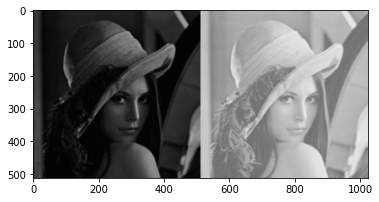

In [39]:
gamma_two_point_two = np.array(255*(img/255)**2.2,dtype='uint8')#Power Law Transformation
gamma_point_four = np.array(255*(img/255)**0.4,dtype='uint8')
img3 = cv2.hconcat([gamma_two_point_two,gamma_point_four])
plt.imshow(img3, cmap='gray', vmin=0, vmax=255)

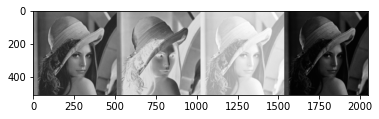

In [41]:
image1 = cv2.hconcat([img, negative, log_image, gamma_two_point_two])
plt.imshow(image1, cmap='gray', vmin=0, vmax=255)

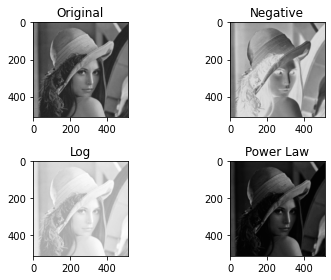

In [42]:
width=10
height=10
rows = 2
cols = 2
axes=[]
fig=plt.figure()
titles = ["Original", "Negative", "Log", "Power Law"]
images = [img, negative, log_image, gamma_two_point_two]

for a in range(len(titles)):
    axes.append( fig.add_subplot(rows, cols, a+1) )
    subplot_title=(titles[a])
    axes[-1].set_title(subplot_title)  
    plt.imshow(images[a], cmap='gray', vmin=0, vmax=255)
fig.tight_layout()    
plt.show()

Experiment 8 Implementaion of Histogram Processing

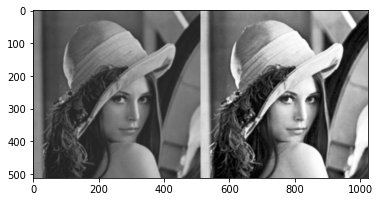

In [44]:
equalized = cv2.equalizeHist(img)# Histogram Equalization
image2 = cv2.hconcat([img, equalized])
plt.imshow(image2, cmap='gray', vmin=0, vmax=255)

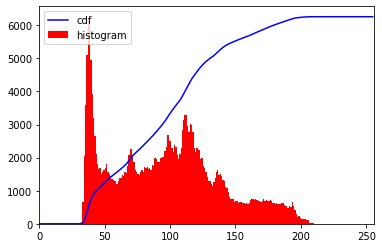

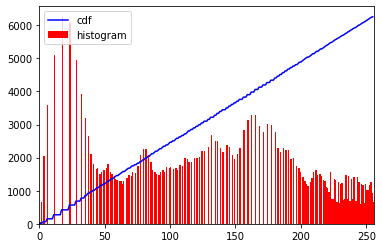

In [47]:
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

hist,bins = np.histogram(equalized.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(equalized.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

Experiment 9 Image edge detection using derivative Filter

In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

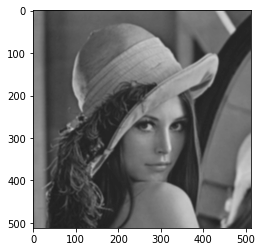

In [12]:
img_raw = cv2.imread("./blurred.png")
img = cv2.cvtColor(img_raw, cv2.COLOR_BGR2GRAY)# Color to grayscale
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

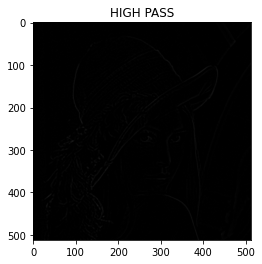

In [13]:
# HIGH PASS FILTER 2D Convolution

#size=int(input("Enter the size of the mask"))
# kernel= np.empty(size)
# print("Enter the entries in a single line (separated by space): ") 
# entries = list(map(int, input().split())) 
# kernel = np.array(entries).reshape(size, size)


#edge detection filter
kernel = np.array([[0.0, -1.0, 0.0], 
                   [-1.0, 4.0, -1.0],
                   [0.0, -1.0, 0.0]])

kernel = kernel/(np.sum(kernel) if np.sum(kernel)!=0 else 1)

#filter the source image
img_rst = cv2.filter2D(img,-1,kernel)

#save result image
plt.title("HIGH PASS")
plt.imshow(img_rst, cmap='gray', vmin=0, vmax=255)

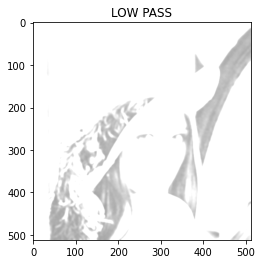

In [14]:
# LOW PASS FILTER 2D Convolution
#prepare the 5x5 shaped filter

#user input for the mask 
# size=int(input("Enter the size of the mask"))
# kernel= np.empty(size)
# print("Enter the entries in a single line (separated by space): ") 
# entries = list(map(int, input().split())) 
# kernel = np.array(entries).reshape(size, size)

kernel = np.array([[1, 1, 1, 1, 1], 
                   [1, 1, 1, 1, 1], 
                   [1, 1, 1, 1, 1], 
                   [1, 1, 1, 1, 1], 
                   [1, 1, 1, 1, 1]])
kernel = kernel/sum(kernel)

#filter the source image
img_rst = cv2.filter2D(img,-1,kernel)

#save result image
plt.title("LOW PASS")
plt.imshow(img_rst, cmap='gray', vmin=0, vmax=255)

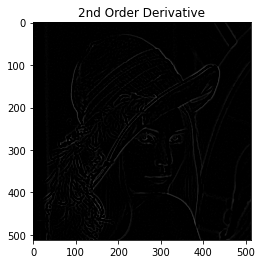

In [35]:
#Laplacian 2nd Order Derivative
lapdst = cv2.Laplacian(img, depth, ksize=kernel_size)
plt.title("2nd Order Derivative")
plt.imshow(lapdst, cmap='gray', vmin=0, vmax=255)

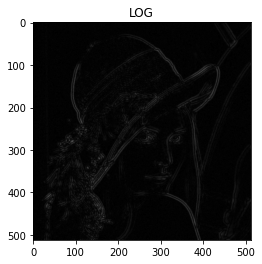

In [16]:
#Laplacian of Gaussian and 2nd Order Derivative

# Declare the variables we are going to use
depth = cv2.CV_16S
kernel_size = 3

# Remove noise by blurring with a Gaussian filter
src = cv2.GaussianBlur(img, (3, 3), 0)
    
# Apply Laplace function
dst = cv2.Laplacian(src, depth, ksize=kernel_size)


 # converting back to uint8
abs_dst = cv2.convertScaleAbs(dst)
    
plt.title("LOG")
plt.imshow(abs_dst, cmap='gray', vmin=0, vmax=255)

Experiment 10 Smoothing and Sharpening of the Image

In [41]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

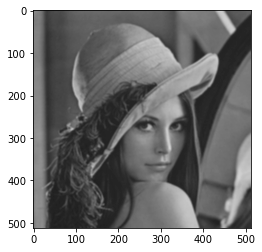

In [42]:
img_raw = cv2.imread("./blurred.png")
img = cv2.cvtColor(img_raw, cv2.COLOR_BGR2GRAY)# Color to grayscale
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

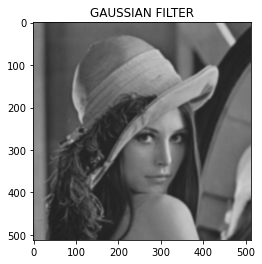

In [43]:
blur = cv2.GaussianBlur(img,(5,5),0) #Gaussian Filter
plt.title("GAUSSIAN FILTER")
plt.imshow(blur, cmap='gray', vmin=0, vmax=255)

Experiment 11 Filtering In Frequency Domain